<a href="https://colab.research.google.com/github/geewynn/shoe_classification/blob/master/shoe_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install google_images_download

     |████████████████████████████████| 911kB 4.2MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=64a59c778c3452b3046f57af2534566085829b0ad22e33ac5318bba5a7ad2fca
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


#Connect to Drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Download Images 

In [0]:
# #importing the library to get images
# from google_images_download import google_images_download

# response = google_images_download.googleimagesdownload()

# #creating list of arguments
# arguments =  {"keywords": "Shoes nike, adidas snickers, puma snickers", "limit":100, "print_urls":True}

# #passing the arguments to the function
# paths = response.download(arguments)

# #printing absolute paths of the downloaded images
# print(paths)

#Install and Import Packages

In [0]:
#install tensorflow 2.0.0

!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 1.2MB/s 
     |████████████████████████████████| 3.8MB 40.0MB/s 
     |████████████████████████████████| 450kB 58.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=3ce921a8dec2bfc4d75a9418ef570b9e406ef24c22f4eb295449e1ffe0f62fd6
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.2
    Uninstalling gast-0.3.2:
      Successfully uninstalled gast-0.3.2
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
#import packages
import pathlib
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#check for tensorflow version. Make sure it is 2.0
tf.__version__

'2.0.0'

#Data Preprocessing

In [0]:
#Specify the path or directory to your image folder
data_dir = '/content/drive/My Drive/shoe classification/downloads'
data_dir = pathlib.Path(data_dir)

In [0]:
#count the total number of jpg images you have
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

196

In [0]:
#output the class names. 

CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array([' puma snickers', 'Shoes nike', ' adidas snickers'], dtype='<U16')

In [0]:
#using keras Image Data Generator to preprocess our dataset.
#This also creates a validation set for the data

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [0]:
#specify the variables for important parameters

BATCH_SIZE = 32
IMG_HEIGHT =256
IMG_WIDTH = 256
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [0]:
#specify the steps per epoch for the model.

train_step_epoch = np.ceil(182//32)
val_step_epoch = np.ceil(43//32)

In [0]:
#create our train and validation dataset

train_data_gen = image_generator.flow_from_directory(directory=data_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),                                                  
                                                     color_mode='rgb',
                                                     classes = list(CLASS_NAMES),
                                                     class_mode='categorical',
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     subset='training')

val_data_gen = image_generator.flow_from_directory(directory=data_dir,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  subset='validation')

Found 182 images belonging to 3 classes.
Found 43 images belonging to 3 classes.


In [0]:
#create image batches

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

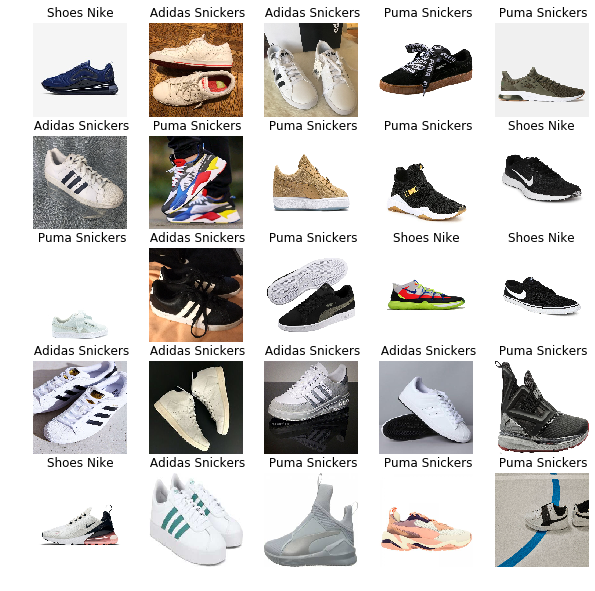

In [0]:
#print the first batch of images

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

#Build and Evaluate the Model

In [0]:
#Build the first CNN model without any augmentation

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])


In [0]:
#compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#fit the model

history = model.fit_generator(train_data_gen, 
                   steps_per_epoch = train_step_epoch,
                    epochs=30,
                    validation_data=val_data_gen,
                    validation_steps= val_step_epoch
                    )

Epoch 1/30
5/5 [==============================] - 17s 3s/step - loss: 8.0012 - accuracy: 0.3533 - val_loss: 12.5923 - val_accuracy: 0.2188
Epoch 2/30
5/5 [==============================] - 16s 3s/step - loss: 10.4781 - accuracy: 0.3467 - val_loss: 12.5923 - val_accuracy: 0.2188
Epoch 3/30
5/5 [==============================] - 16s 3s/step - loss: 11.0812 - accuracy: 0.3125 - val_loss: 12.5923 - val_accuracy: 0.2188
Epoch 4/30
5/5 [==============================] - 16s 3s/step - loss: 9.6251 - accuracy: 0.4000 - val_loss: 12.5923 - val_accuracy: 0.2188
Epoch 5/30
5/5 [==============================] - 16s 3s/step - loss: 10.5544 - accuracy: 0.3467 - val_loss: 12.5923 - val_accuracy: 0.2188
Epoch 6/30
5/5 [==============================] - 15s 3s/step - loss: 10.5544 - accuracy: 0.3467 - val_loss: 12.5923 - val_accuracy: 0.2188
Epoch 7/30
5/5 [==============================] - 13s 3s/step - loss: 10.4144 - accuracy: 0.3533 - val_loss: 12.5923 - val_accuracy: 0.2188
Epoch 8/30
5/5 [======

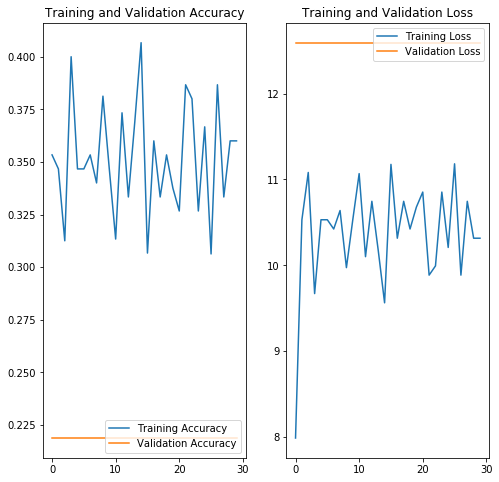

In [0]:
#visualize the training and validation accuracy and loss


epochs =30
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Performing Data Augmentation

In [0]:
#Perform different augmentation on the data, changing the hight, width, rotation, horizontal_flip and zooming

image_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=45,
                               width_shift_range=.15,
                               height_shift_range=.15,
                               horizontal_flip=True,
                               zoom_range=0.5,
                               validation_split=0.2)

In [0]:
#create our train and validation data on the augmented generator

train_data_gen = image_gen.flow_from_directory(directory=data_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),                                                 
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                     subset='training')

val_data_gen = image_gen.flow_from_directory(directory=data_dir,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                             class_mode='categorical',
                                              subset='validation')

Found 182 images belonging to 3 classes.
Found 43 images belonging to 3 classes.


In [0]:
#build the new model. Using the dropout function

model_new = Sequential([
    Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])


In [0]:
#compile the new model
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 64, 64, 16)      

In [0]:
#train the new model

history = model_new.fit_generator(train_data_gen, 
                                  steps_per_epoch = train_step_epoch,
                                  epochs=30,
                                  validation_data=val_data_gen,
                                  validation_steps= val_step_epoc)

Epoch 1/30
5/5 [==============================] - 33s 7s/step - loss: 0.1679 - accuracy: 0.9267 - val_loss: 0.7729 - val_accuracy: 0.6875
Epoch 2/30
5/5 [==============================] - 31s 6s/step - loss: 0.2020 - accuracy: 0.9089 - val_loss: 0.5375 - val_accuracy: 0.8125
Epoch 3/30
5/5 [==============================] - 33s 7s/step - loss: 0.1114 - accuracy: 0.9667 - val_loss: 0.6047 - val_accuracy: 0.7812
Epoch 4/30
5/5 [==============================] - 31s 6s/step - loss: 0.1375 - accuracy: 0.9244 - val_loss: 0.8729 - val_accuracy: 0.7500
Epoch 5/30
5/5 [==============================] - 31s 6s/step - loss: 0.1196 - accuracy: 0.9511 - val_loss: 0.5098 - val_accuracy: 0.8021
Epoch 6/30
5/5 [==============================] - 31s 6s/step - loss: 0.1287 - accuracy: 0.9533 - val_loss: 0.6809 - val_accuracy: 0.8021
Epoch 7/30
5/5 [==============================] - 31s 6s/step - loss: 0.1050 - accuracy: 0.9600 - val_loss: 0.8946 - val_accuracy: 0.7812
Epoch 8/30
5/5 [==================

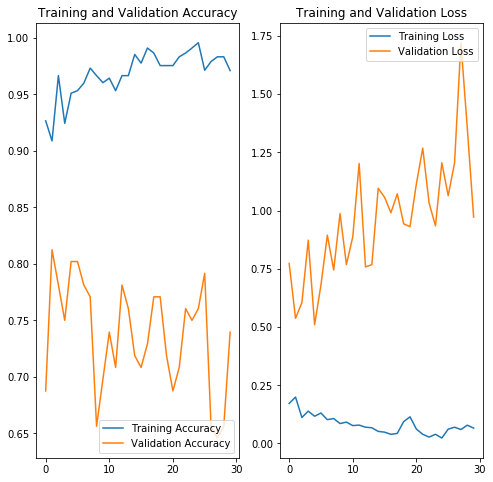

In [0]:
#visualize the model train and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()